In [1]:
import pandas as pd

In [92]:
df = pd.read_csv('dataset.csv', encoding='windows-1252')
print(df.head())
print(df.info())

  Order Date  Row ID        Order ID       Ship Mode Customer ID      Segment  \
0   01-01-20     849  CA-2017-107503  Standard Class    GA-14725     Consumer   
1   01-01-20    4010  CA-2017-144463  Standard Class    SC-20725     Consumer   
2   01-01-20    6683  CA-2017-154466     First Class    DP-13390  Home Office   
3   01-01-20    8070  CA-2017-151750  Standard Class    JM-15250     Consumer   
4   01-01-20    8071  CA-2017-151750  Standard Class    JM-15250     Consumer   

         Country         City       State  Postal Code   Region  \
0  United States       Lorain        Ohio        44052     East   
1  United States  Los Angeles  California        90036     West   
2  United States     Franklin   Wisconsin        53132  Central   
3  United States   Huntsville       Texas        77340  Central   
4  United States   Huntsville       Texas        77340  Central   

        Product ID         Category Sub-Category  \
0  FUR-FU-10003878        Furniture  Furnishings   
1  FUR

In [93]:
df.describe()
df.drop(['Country'], axis = 1, inplace=True)

In [94]:
m = df['Profit'].mean()
std = df['Profit'].std()
# df = df[(df['Profit'] <= m + 3 * std) & (df['Profit'] >= m - 3 * std)]
# df = df[df['Segment'] == 'Consumer']

<Axes: ylabel='Frequency'>

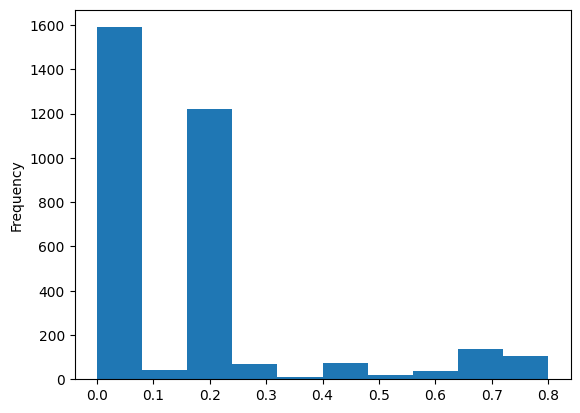

In [95]:
df['Discount'].plot(kind='hist')

In [96]:
def compare_profit(df, discounted):
    combined_profit_with_discount = discounted['Profit'].sum()
    combined_profit_without_discount = df[df['Discount'] == 0]['Profit'].sum()
    
    average_profit_with_discount = discounted['Profit'].mean()
    average_profit_without_discount = df[df['Discount'] == 0]['Profit'].mean()
    
    print("Combined Profit:")
    print(f"With Discount: {combined_profit_with_discount}")
    print(f"Without Discount: {combined_profit_without_discount}")
    
    print("\nAverage Profit:")
    print(f"With Discount: {average_profit_with_discount}")
    print(f"Without Discount: {average_profit_without_discount}")

In [97]:
compare_profit(df, df)
compare_profit(df, df[df['Discount'].between(0.0, 0.3, inclusive='both')])

Combined Profit:
With Discount: 93439.2696
Without Discount: 104157.71220000001

Average Profit:
With Discount: 28.212339855072464
Without Discount: 65.50799509433963
Combined Profit:
With Discount: 137141.5672
Without Discount: 104157.71220000001

Average Profit:
With Discount: 46.88600588034188
Without Discount: 65.50799509433963


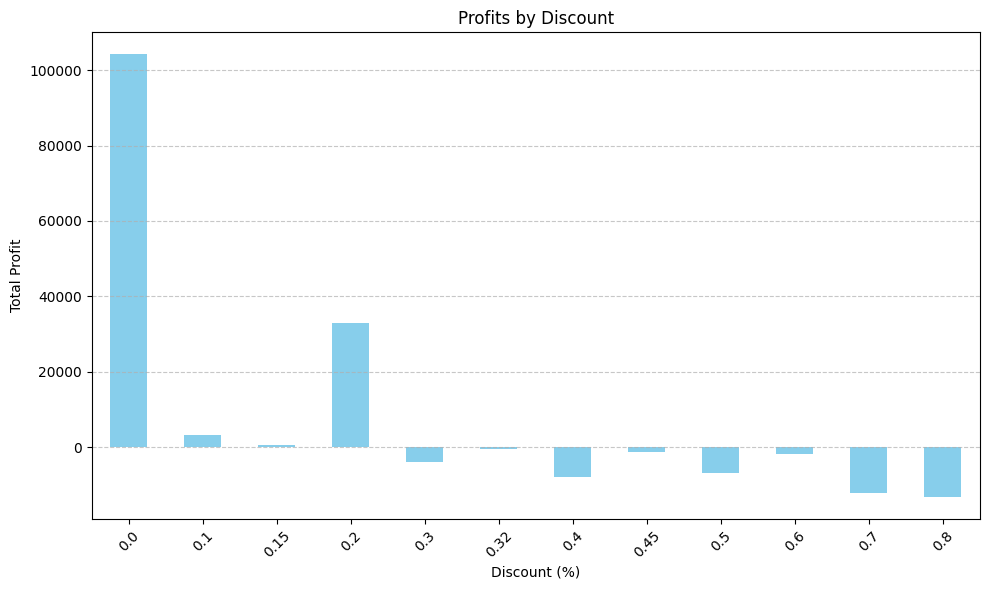

In [98]:
import matplotlib.pyplot as plt
profits_by_discount = df.groupby('Discount')['Profit'].sum()

plt.figure(figsize=(10, 6))
profits_by_discount.plot(kind='bar', color='skyblue')
plt.title('Profits by Discount')
plt.xlabel('Discount (%)')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [99]:
df = df[df['Discount'] <= 0.4] # Discounts over 40% have never yielded profits

In [109]:
for segment in df['Segment'].unique():
    seg = df[df['Segment'] == segment]
    print(segment)
    for col in df['Sub-Category'].unique():
        cat = seg[seg['Sub-Category'] == col]
        customer = pd.DataFrame()
        for ind, row in cat.iterrows():
            rowid = row['Row ID']
            client = row['Customer ID']
            prev_purch = cat.iloc[:rowid]
            prev_purch = prev_purch[prev_purch['Customer ID'] == client]
            if prev_purch.empty:
                break
            prev_purch = prev_purch.drop(['Order Date', 'Order ID', 'Row ID', 'City', 'Postal Code', 'Product ID', 'Category', 'Product Name'], axis=1)
            mode = lambda x: x.value_counts().index[0]
            customer = prev_purch.agg({'Ship Mode': mode, 'Segment': mode, 'State': mode, 'Region': mode, 'Sub-Category': mode, 'Sales': 'mean', 'Quantity': 'mean', 'Discount': 'mean', 'Profit': 'mean'})#.groupby('Customer ID')
            print(customer)

Consumer
Ship Mode       Standard Class
Segment               Consumer
State                     Ohio
Region                    East
Sub-Category       Furnishings
Sales                   48.896
Quantity                   4.0
Discount                   0.2
Profit                  8.5568
dtype: object
Ship Mode       Standard Class
Segment               Consumer
State               California
Region                    West
Sub-Category       Furnishings
Sales                   474.43
Quantity                  11.0
Discount                   0.0
Profit                199.2606
dtype: object
Ship Mode       Second Class
Segment             Consumer
State           Pennsylvania
Region                  East
Sub-Category     Furnishings
Sales                 31.968
Quantity                 2.0
Discount                 0.2
Profit                6.3936
dtype: object
Ship Mode       Standard Class
Segment               Consumer
State                  Georgia
Region                   South
Sub-Ca